In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('antfile17.csv')

In [4]:
data.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,56,2,2,51,169,1200,37,16,35,0.848864,...,0.875000,2,0.409639,0.155844,1,5,31.607143,14,2.1964,1
1,21,1,2,14,47,124,10,4,18,0.700000,...,0.857143,0,0.000000,0.325397,0,0,26.047619,10,2.6190,0
2,11,2,0,17,15,13,15,3,11,0.750000,...,1.000000,3,0.200000,0.220779,0,0,7.272727,1,0.7273,0
3,15,4,3,499,30,0,498,1,15,0.392857,...,1.000000,1,0.619048,0.322222,1,3,9.066667,2,0.6667,0
4,7,1,0,16,7,21,15,1,7,2.000000,...,0.000000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,1


In [14]:
data.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,11.071141,2.522148,0.731544,11.046980,34.362416,89.147651,5.655034,5.746309,8.365101,1.013342,...,0.644855,0.726174,0.509968,0.474685,0.720805,1.312752,23.640870,4.669799,1.366053,0.222819
std,11.975963,1.398869,4.800357,26.343149,36.024972,349.937555,25.814223,5.653176,9.331319,0.619015,...,0.438138,1.426581,0.398696,0.259931,0.938948,2.332602,76.986079,6.276853,0.881739,0.416417
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,4.000000,11.000000,0.000000,0.000000,2.000000,3.000000,0.666667,...,0.000000,0.000000,0.000000,0.269841,0.000000,0.000000,9.066667,1.000000,0.857100,0.000000
50%,7.000000,2.000000,0.000000,6.000000,23.000000,6.000000,1.000000,4.000000,6.000000,0.833333,...,1.000000,0.000000,0.681818,0.437500,0.000000,0.000000,16.400000,3.000000,1.142900,0.000000
75%,14.000000,4.000000,0.000000,11.000000,43.000000,53.000000,4.000000,8.000000,10.000000,1.500000,...,1.000000,1.000000,0.869919,0.666667,1.000000,2.000000,28.000000,6.000000,1.666700,0.000000
max,120.000000,7.000000,102.000000,499.000000,288.000000,6692.000000,498.000000,37.000000,103.000000,2.000000,...,1.000000,11.000000,1.000000,1.000000,5.000000,19.000000,2052.000000,53.000000,6.777800,1.000000


In [9]:
rows = data.shape[0]
rows

745

In [10]:
cols = data.shape[1]
cols

21

In [5]:
bug_counts = data.iloc[:-1].value_counts()
bug_counts

wmc  dit  noc  cbo  rfc  lcom  ca   ce  npm  lcom3     loc   dam       moa  mfa       cam       ic  cbm  amc        max_cc  avg_cc  bug
3    3    0    2    11   3     1    1   3    2.000000  25    0.000000  0    0.800000  0.666667  2   2    7.333333   1       0.6667  0      4
1    1    0    4    1    0     3    1   1    2.000000  1     0.000000  0    0.000000  1.000000  0   0    0.000000   1       1.0000  0      4
7    2    0    4    21   3     2    4   7    0.666667  108   1.000000  0    0.500000  0.428571  1   1    13.714286  2       1.0000  0      3
1    1    0    3    1    0     2    1   1    2.000000  1     0.000000  0    0.000000  1.000000  0   0    0.000000   1       1.0000  0      3
               2    1    0     2    0   1    2.000000  1     0.000000  0    0.000000  1.000000  0   0    0.000000   1       1.0000  0      2
                                                                                                                                          ..
5    2    0    8  

In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1] #last bug column

In [7]:
#SMOTE-Tomek balancing
smote_tomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smote_tomek.fit_resample(x,y)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.1, random_state=42, stratify=y_resampled)


In [11]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
# Step 1: Train the model with a random value of k (e.g., k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [14]:
# Predicting on the test data
y_pred = knn.predict(x_test_scaled)


In [16]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [17]:
print("Accuracy with k=5:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with k=5: 0.8333333333333334
Confusion Matrix:
 [[43 14]
 [ 5 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        57
           1       0.79      0.91      0.85        57

    accuracy                           0.83       114
   macro avg       0.84      0.83      0.83       114
weighted avg       0.84      0.83      0.83       114



In [19]:
# Step 2: Find the best k value by plotting accuracy for k values from 1 to 30
k_range = range(1, 31)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))


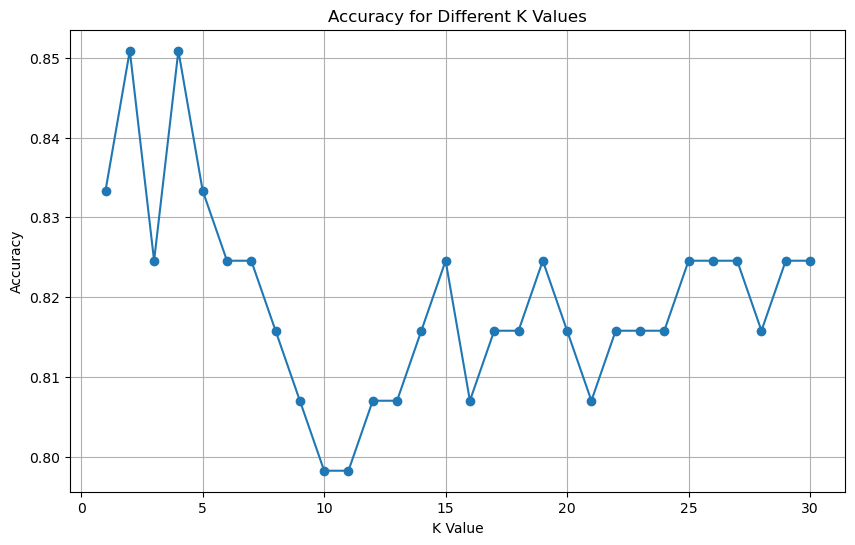

In [20]:
# Plotting the accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different K Values')
plt.grid(True)
plt.show()


In [21]:
# Choosing the best k (with the highest accuracy)
best_k = k_range[accuracies.index(max(accuracies))]
print("Best k value:", best_k)

Best k value: 2


In [22]:
# Training the model again with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=2)

In [24]:
# Predicting on the test data
y_pred_best_k = knn.predict(x_test_scaled)

In [25]:
# Evaluating the model with the best k
accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
conf_matrix_best_k = confusion_matrix(y_test, y_pred_best_k)
class_report_best_k = classification_report(y_test, y_pred_best_k)

In [26]:
print("Accuracy with best k:", accuracy_best_k)
print("Confusion Matrix:\n", conf_matrix_best_k)
print("Classification Report:\n", class_report_best_k)

Accuracy with best k: 0.8508771929824561
Confusion Matrix:
 [[48  9]
 [ 8 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        57
           1       0.84      0.86      0.85        57

    accuracy                           0.85       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.85      0.85      0.85       114

